In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('C:/Users/민지/Downloads/car.data', index_col=0)
data.head()

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


In [2]:
data.isna().sum()

vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [3]:
data.columns

Index(['vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

Text(0.5, 1.0, 'unacc')

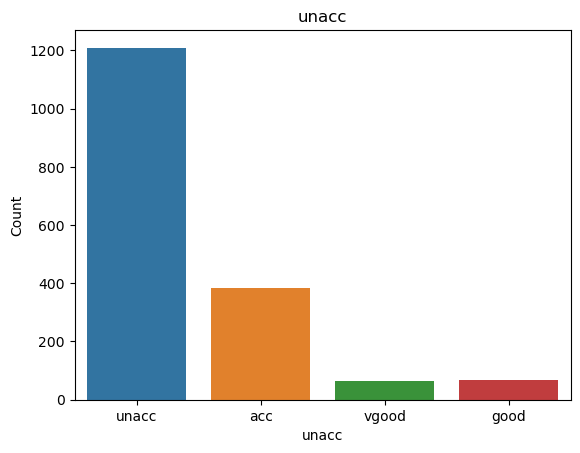

In [5]:
import matplotlib.pyplot as plt

sns.countplot(data=data, x='unacc')
plt.xlabel('unacc')
plt.ylabel('Count')
plt.title('unacc')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [7]:
data

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,3,0,0,2,2,2
vhigh,3,0,0,2,0,2
vhigh,3,0,0,1,1,2
vhigh,3,0,0,1,2,2
vhigh,3,0,0,1,0,2
...,...,...,...,...,...,...
low,1,3,2,1,2,1
low,1,3,2,1,0,3
low,1,3,2,0,1,2


In [9]:
X = data.iloc[:,0:6].values
y = data.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
X

array([[3, 0, 0, 2, 2, 2],
       [3, 0, 0, 2, 0, 2],
       [3, 0, 0, 1, 1, 2],
       ...,
       [1, 3, 2, 0, 1, 2],
       [1, 3, 2, 0, 2, 1],
       [1, 3, 2, 0, 0, 3]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(6,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 80)                8080      
                                                                 
 dense_6 (Dense)             (None, 60)                4860      
                                                                 
 dense_7 (Dense)             (None, 4)                 244       
                                                                 
Total params: 13,884
Trainable params: 13,884
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 2s 15ms/step - loss: 0.4012 - accuracy: 0.8762 - val_loss: 0.1734 - val_accuracy: 0.9306
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1885 - accuracy: 0.9471 - val_loss: 0.1359 - val_accuracy: 0.9422
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0820 - accuracy: 0.9783 - val_loss: 0.1232 - val_accuracy: 0.9566
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0187 - val_accuracy: 0.9971
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1002 - accuracy: 0.9804 - val_loss: 0.1355 - val_accuracy: 0.9538
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1670 - accuracy: 0.9457 - val_loss: 0.0915 - val_accuracy: 0.9364
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0485 - accuracy: 0.9826 - val_loss: 0.0410 - val_accuracy: 0.9855
Epoch 8/100


44/44 [==============================] - 0s 4ms/step - loss: 4.8471e-06 - accuracy: 1.0000 - val_loss: 2.6043e-05 - val_accuracy: 1.0000
Epoch 57/100
44/44 [==============================] - 0s 5ms/step - loss: 4.6775e-06 - accuracy: 1.0000 - val_loss: 2.4957e-05 - val_accuracy: 1.0000
Epoch 58/100
44/44 [==============================] - 0s 5ms/step - loss: 4.4418e-06 - accuracy: 1.0000 - val_loss: 2.3383e-05 - val_accuracy: 1.0000
Epoch 59/100
44/44 [==============================] - 0s 4ms/step - loss: 4.2879e-06 - accuracy: 1.0000 - val_loss: 2.2479e-05 - val_accuracy: 1.0000
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 4.1463e-06 - accuracy: 1.0000 - val_loss: 2.1800e-05 - val_accuracy: 1.0000
Epoch 61/100
44/44 [==============================] - 0s 4ms/step - loss: 3.8809e-06 - accuracy: 1.0000 - val_loss: 2.1160e-05 - val_accuracy: 1.0000
Epoch 62/100
44/44 [==============================] - 0s 5ms/step - loss: 3.7692e-06 - accuracy: 1.0000 - val_los

In [15]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 6.0145e-06 - accuracy: 1.0000


[6.014470272930339e-06, 1.0]

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00        16

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

[[ 77   0   0   0]
 [  0  14   0   0]
 [  0   0 239   0]
 [  0   0   0  16]]
